In [44]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

CR_COLOR = "#0079FF"

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image


SMALL_SIZE = 12 * 3
MEDIUM_SIZE = 18 * 3
LARGE_SIZE = 24 * 3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title





In [45]:
df_2022 = pd.read_csv("../data/2022-23_reg_season_clean.csv")
df_2023 = pd.read_csv("../data/2023-24_reg_season_clean.csv")


# main df
# df = df_2022.copy()
df = df_2023.copy()

# convert to date type
df["game_time"] = pd.to_datetime(df["game_time"])
df["date"] = pd.to_datetime(df["date"])

print(df_2022.shape)
print(df_2023.shape)
df.head(2)

(2460, 70)
(2400, 70)


,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127


In [46]:
# mark the week of season
df['week_number'] = df['date'].dt.isocalendar().week
df['week_of_season'] = np.where(df['week_number'] >= 43, df['week_number'] - 42, df['week_number'] + 1 +(df['week_number'].max() - df['week_number'][0]))

df['team_game_id'] = df.groupby('abbreviation').cumcount() + 1
df.head()

,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff,week_number,week_of_season,team_game_id
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193,43,1,1
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127,43,1,2
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853,43,1,3
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Minnesota Timberwolves,MIN,America/Chicago,-1,845,44.980,93.276,0,1,0,0,33.757,84.396,1023,ATL,MIN,MIN@ATL_2023-10-30,24.5,0,1,0,1,1,1,1,2,True,4,1,0,1.0,3.0,5.0,150.0,150.0,150.0,150.0,2,3,87.917,43.045,667.804853,1335.609706,1,Minnesota Timberwolves,MIN,47.5,2,905.694219,905.694219,-23.0,1,-237.889366,429.915487,44,2,4
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Washington Wizards,WAS,America/New_York,0,46,38.898,77.021,0,1,0,0,33.757,84.396,1023,ATL,WAS,WAS@ATL_2023-11-01,48.0,1,0,1,0,1,1,1,2,False,4,2,0,2.0,3.0,5.0,7.0,150.0,150.0,150.0,2,4,84.396,33.757,0.000000,0.000000,0,Washington Wizards,WAS,48.5,3,541.319182,541.319182,-0.5,1,-541.319182,-541.319182,44,2,5


In [47]:
# mark the first game after the 12/2
after_cup_dict = (
    df[df["date"].gt("2023-12-02")]
    .groupby("abbreviation")
    .first()["team_game_id"]
    .to_dict()
)
# after_cup_dict

df["after_id"] = df["abbreviation"].map(after_cup_dict)
df["is_first_after_cup"] = np.where(df["team_game_id"] == df["after_id"], 1, 0)


# mark if game time is different than what the team lives in
df["is_diff_timezone"] = np.where(
    df["time_diff_from_et"] != df["time_diff_from_et_opponent"], 1, 0
)

df["is_timezone_ahead"] = np.where(
    df["time_diff_from_et"] < df["game_time_diff_from_et"], 1, 0
)
df["is_timezone_behind"] = np.where(
    df["time_diff_from_et"] > df["game_time_diff_from_et"], 1, 0
)

In [57]:
# teams with most different timezone games
piv = df.pivot_table(
    index=["season_start_year","abbreviation", "team"],
    values=["is_diff_timezone", "is_timezone_ahead", "is_timezone_behind"],
    aggfunc="sum"
    
).sort_values(by="is_diff_timezone").reset_index()
piv['team'] = piv['team'].str.split(" ").str[-1]
print(piv.shape)
piv.head()
# ax = piv.plot(
#     kind="bar",
#     x="abbreviation",
#     legend=False,
#     y="is_diff_timezone",
#     title="Number of games in different timezone from home",
#     # ylabel="Miles",
#     xlabel="Team",
#     # grid='y',
#     figsize=(8,4)
# )
# ax.grid(axis="y")
# piv.head(2)
# plt.show()

(30, 6)


,season_start_year,abbreviation,team,is_diff_timezone,is_timezone_ahead,is_timezone_behind
0,2023,ATL,Hawks,36,0,19
1,2023,PHI,76ers,36,0,18
2,2023,WAS,Wizards,36,0,18
3,2023,BKN,Nets,36,0,17
4,2023,CHA,Hornets,37,0,18


In [49]:
# piv.reset_index(drop=True)#.to_json()

In [50]:
# # chatgpt
# chart_data = piv.reset_index(drop=True).sort_values(by=["is_diff_timezone", "is_timezone_ahead"])


# # Define the figure and axes
# fig, ax = plt.subplots(figsize=(36, 18))


# # Function to load and display PNG images above the bars
# def add_image_above_bar(image_path, ax, bar, offset_x=0, offset_y=3_500):
#     img = Image.open(image_path)
#     # img = img.convert("RGBA")  # Convert to RGBA format to handle transparency
#     # img = img.resize((30, 30))  # Adjust the image size as needed
#     img = img.resize((80, 80))  # Adjust the image size as needed
#     # img = img.resize((40, 40))  # Adjust the image size as needed

#     imagebox = OffsetImage(img, zoom=1)
#     ab = AnnotationBbox(
#         imagebox,
#         (bar.get_x() + bar.get_width() / 2 + offset_x, bar.get_height() + offset_y),
#         frameon=False,
#     )
#     ax.add_artist(ab)



# # plt.figure(figsize=(12, 6))
# sns.barplot(data=chart_data, x='abbreviation', y='is_diff_timezone', color=CR_COLOR, label='is_diff_timezone', errorbar=None)
# sns.barplot(data=chart_data, x='abbreviation', y='is_timezone_ahead', color='red', label='is_timezone_ahead', errorbar=None)


# # Load and display PNG images above the bars
# # for index, row in piv.iterrows():
# #     # print(index, row['abbreviation'])
# #     image_path = f"../assets/_nba_png/{row['abbreviation'].lower()}.png"
# #     add_image_above_bar(image_path, ax, bars[index])


# plt.xlabel('Abbreviation')
# plt.ylabel('Count')
# plt.title('Bar Chart with is_diff_timezone and is_timezone_ahead')
# plt.legend()
# plt.xticks(rotation=90)
# plt.grid(axis="y")
# plt.show()

In [51]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


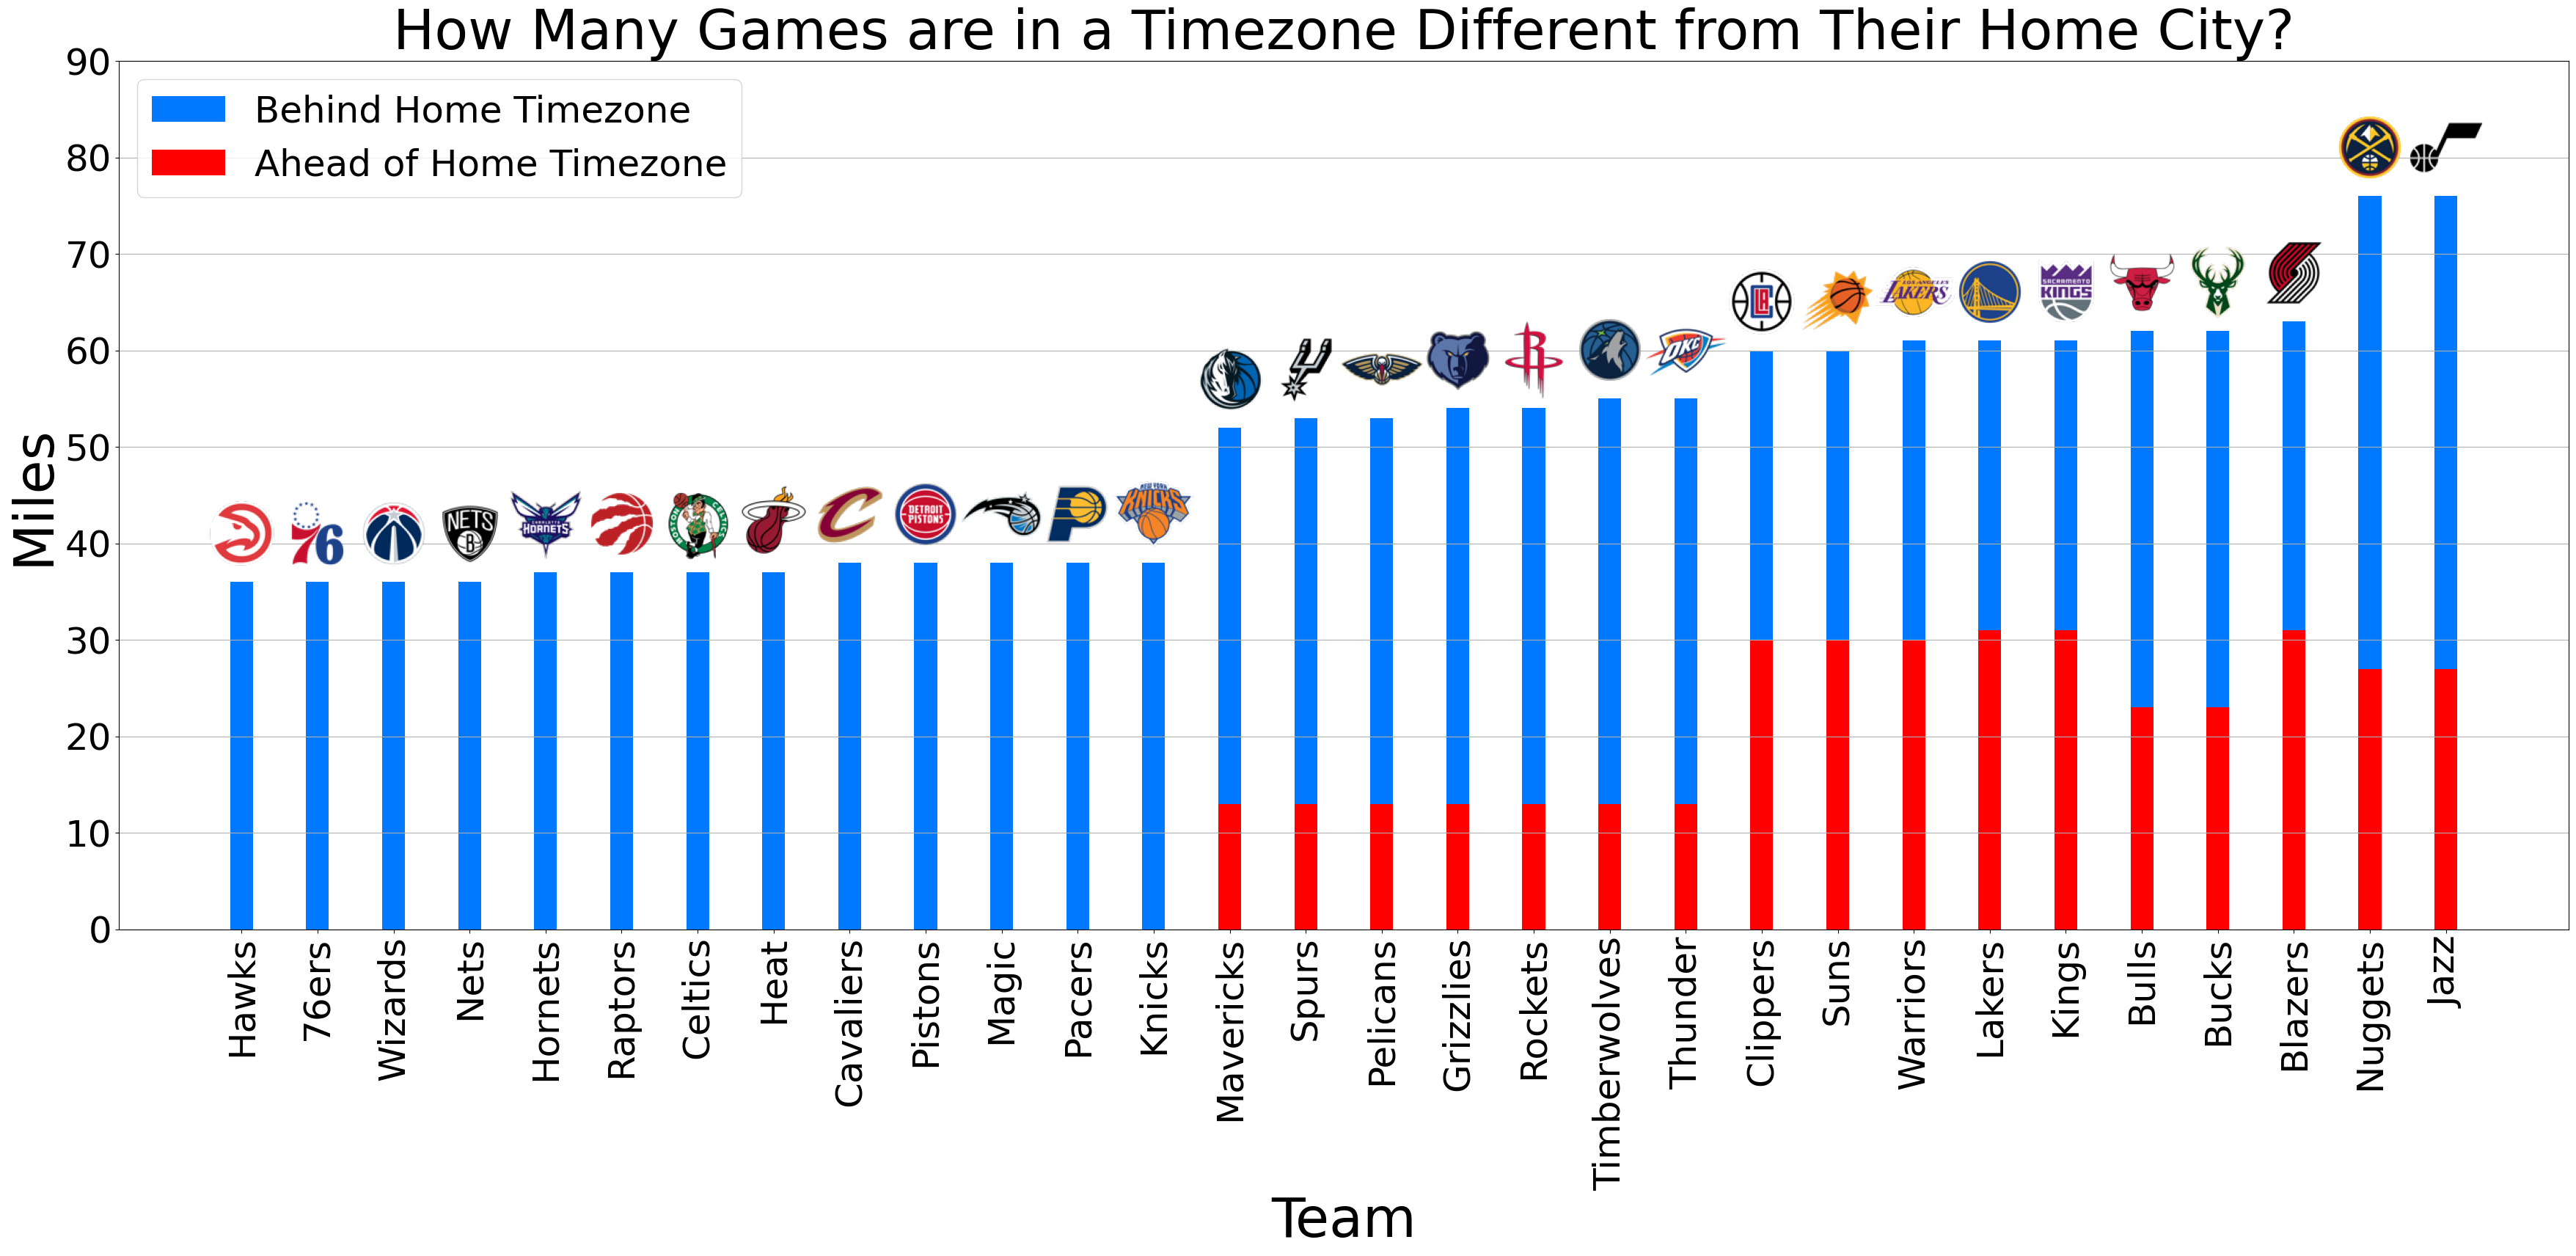

[2023]


In [69]:
# from chat gpt
# import pandas as pd
# import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image


SMALL_SIZE = 12 * 3
MEDIUM_SIZE = 18 * 3
LARGE_SIZE = 24 * 3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title


# make chart df
chart_data = piv.reset_index(drop=True).sort_values(by=["is_diff_timezone", "is_timezone_ahead"])



# Define the figure and axes
fig, ax = plt.subplots(figsize=(36, 18))
# fig, ax = plt.subplots()

# # Create the bar chart
bars = ax.bar(
    chart_data["team"],
    chart_data["is_diff_timezone"],
    width=0.3,
    color="#0079FF", 
    # edgecolor="black",
    label="Behind Home Timezone",
)
bars2= ax.bar(
    chart_data["team"],
    chart_data["is_timezone_ahead"],
    width=0.3,
    color="red", 
    # edgecolor="black",
    label="Ahead of Home Timezone",
)


# Function to load and display PNG images above the bars
def add_image_above_bar(image_path, ax, bar, offset_x=0, offset_y=5):
    img = Image.open(image_path)
    # img = img.convert("RGBA")  # Convert to RGBA format to handle transparency
    # img = img.resize((30, 30))  # Adjust the image size as needed
    img = img.resize((80, 80))  # Adjust the image size as needed
    # img = img.resize((40, 40))  # Adjust the image size as needed

    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(
        imagebox,
        (bar.get_x() + bar.get_width() / 2 + offset_x, bar.get_height() + offset_y),
        frameon=False,
    )
    ax.add_artist(ab)


# Load and display PNG images above the bars
for index, row in chart_data.iterrows():
    # print(index, row['abbreviation'])
    image_path = f"../assets/_nba_png/{row['abbreviation'].lower()}.png"
    add_image_above_bar(image_path, ax, bars[index])


# Customize the chart
ax.set_xlabel("Team")
ax.set_ylabel("Miles")
ax.grid(axis="y")

ax.legend()


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)#, ha="right")
plt.title("How Many Games are in a Timezone Different from Their Home City?", fontsize=MEDIUM_SIZE)
# plt.title("", fontsize=MEDIUM_SIZE)
plt.ylim(0, 90)

# after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# sns.despine()
plt.tight_layout()

plt.savefig("timezone_league_1.png")
plt.show()
print(chart_data['season_start_year'].unique())

In [53]:
# sns.barplot(x="abbreviation", y="is_diff_timezone", data=piv.reset_index())
# plt.xticks(rotation=90)
# plt.show()

In [54]:



# Create a bar chart with Plotly
fig = px.bar(df, x='abbreviation', y=['is_diff_timezone', 'is_timezone_ahead'], title='Bar Chart with is_diff_timezone and is_timezone_ahead')
fig.show()

In [55]:
assert False

AssertionError: 

In [ ]:
# df.columns

In [ ]:
assert False

In [ ]:
# total travel for each team (simple)
piv = df.pivot_table(
    index=["season_start_year","abbreviation", "team"],
    values="distance_from_previous_game",
    aggfunc="sum"
    
).sort_values(by="distance_from_previous_game").reset_index()
piv['team'] = piv['team'].str.split(" ").str[-1]
print(piv.shape)
# piv
# ax = piv.plot(
#     kind="bar",
#     x="abbreviation",
#     legend=False,
#     title="Total Distance traveled by each team for the 2023 Season",
#     ylabel="Miles",
#     xlabel="Team",
#     # grid='y',
#     figsize=(8,4)
# )
# ax.grid(axis="y")
piv.head(2)
